### Objective is to find better predictions on house price
- the objective of this dataset was to clean the data and get minimim performance but not to expect perfect

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
data = pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [4]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
char_cols = data.select_dtypes(include= np.object).columns
char_cols

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [44]:
data.isna().sum()

area_type       0
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
for i in list(char_cols):
    print(i,': {}'.format(data[i].nunique()), '\n')

area_type : 4 

availability : 81 

location : 1305 

size : 31 

society : 2688 

total_sqft : 2117 



### Data Cleaning

In [8]:
data.drop(columns= ['availability', 'location', 'society'], inplace= True)
data.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00


In [9]:
house_data = data.copy(deep= True)
house_data.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00


In [10]:
house_data['size'].str.split().str[0]

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13320, dtype: object

In [11]:
house_data['Bedrooms'] = house_data['size'].str.split().str[0]
house_data.head(10)

,area_type,size,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00,2
5,Super built-up Area,2 BHK,1170,2.0,1.0,38.00,2
6,Super built-up Area,4 BHK,2732,4.0,NaN,204.00,4
7,Super built-up Area,4 BHK,3300,4.0,NaN,600.00,4
8,Super built-up Area,3 BHK,1310,3.0,1.0,63.25,3
9,Plot Area,6 Bedroom,1020,6.0,NaN,370.00,6


In [12]:
house_data.drop(columns='size', inplace= True)

In [13]:
house_data.head()

,area_type,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,1056,2.0,1.0,39.07,2
1,Plot Area,2600,5.0,3.0,120.00,4
2,Built-up Area,1440,2.0,3.0,62.00,3
3,Super built-up Area,1521,3.0,1.0,95.00,3
4,Super built-up Area,1200,2.0,1.0,51.00,2


In [14]:
house_data.isnull().sum()

area_type       0
total_sqft      0
bath           73
balcony       609
price           0
Bedrooms       16
dtype: int64

In [15]:
type(house_data['Bedrooms'][0])

str

In [16]:
house_data['Bedrooms'] = house_data['Bedrooms'].fillna(method = 'ffill')
house_data['bath'] = house_data['bath'].interpolate()
house_data['balcony'] = house_data['balcony'].interpolate()
house_data.isna().sum()

area_type     0
total_sqft    0
bath          0
balcony       0
price         0
Bedrooms      0
dtype: int64

In [17]:
house_data.columns

Index(['area_type', 'total_sqft', 'bath', 'balcony', 'price', 'Bedrooms'], dtype='object')

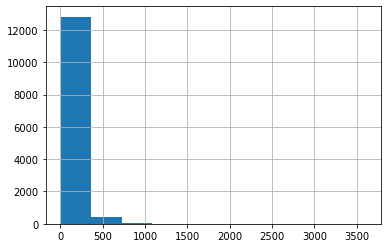

In [18]:
house_data['price'].hist()
plt.show()

In [19]:
house_data['total_sqft'] = house_data['total_sqft'].str.split().str[0]

In [20]:
house_data['total_sqft'] = pd.to_numeric(house_data['total_sqft'], errors= 'coerce')

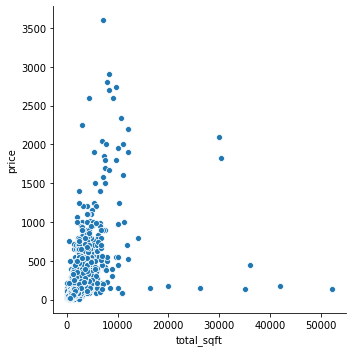

In [21]:
sns.relplot(x = 'total_sqft', y = 'price',kind = 'scatter', data = house_data )
plt.show()

In [22]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   total_sqft  13274 non-null  float64
 2   bath        13320 non-null  float64
 3   balcony     13320 non-null  float64
 4   price       13320 non-null  float64
 5   Bedrooms    13320 non-null  object 
dtypes: float64(4), object(2)
memory usage: 624.5+ KB


In [23]:
house_data.head()

,area_type,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,1056.0,2.0,1.0,39.07,2
1,Plot Area,2600.0,5.0,3.0,120.00,4
2,Built-up Area,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,1200.0,2.0,1.0,51.00,2


In [24]:
house_data['bath'] = house_data['bath'].apply(str)
house_data['balcony'] = house_data['balcony'].apply(str)

In [25]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   total_sqft  13274 non-null  float64
 2   bath        13320 non-null  object 
 3   balcony     13320 non-null  object 
 4   price       13320 non-null  float64
 5   Bedrooms    13320 non-null  object 
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [26]:
house_data['total_sqft'] = house_data['total_sqft'].interpolate()

In [27]:
from sklearn.preprocessing import MinMaxScaler
ms  = MinMaxScaler() 
house_data.iloc[:, [1,4]] = ms.fit_transform(house_data.iloc[:, [1,4]])

In [28]:
house_data.head()

,area_type,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,0.020183,2.0,1.0,0.008650,2
1,Plot Area,0.049722,5.0,3.0,0.031180,4
2,Built-up Area,0.027530,2.0,3.0,0.015033,3
3,Super built-up Area,0.029079,3.0,1.0,0.024220,3
4,Super built-up Area,0.022938,2.0,1.0,0.011971,2


In [29]:
final_data = pd.get_dummies(house_data, columns= list(house_data.select_dtypes(include= np.object).columns))
final_data.head()

,total_sqft,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bath_1.0,bath_1.5,bath_10.0,bath_11.0,...,Bedrooms_2,Bedrooms_27,Bedrooms_3,Bedrooms_4,Bedrooms_43,Bedrooms_5,Bedrooms_6,Bedrooms_7,Bedrooms_8,Bedrooms_9
0,0.020183,0.008650,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.049722,0.031180,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.027530,0.015033,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.029079,0.024220,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.022938,0.011971,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
X = final_data.drop(columns= 'price').values
y = final_data.iloc[:, 1]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Creating a function for GridSearchCV

def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'n_jobs': [-1]
            }
            
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(criterion='mse', random_state= 0),
            'parameters': {
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestRegressor(criterion='mse', random_state= 0),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVR(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_shuffle, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])

find_best_model(X, y)

,model,best_parameters,accuracy
0,linear_regression,{'n_jobs': -1},-6.061778e+21
1,decision_tree,{'max_depth': 5},4.919766e-01
2,random_forest,{'n_estimators': 200},4.988984e-01
3,svm,"{'C': 10, 'kernel': 'linear'}",-2.198774e+00


In [38]:
from sklearn.ensemble import AdaBoostRegressor
decision_model = DecisionTreeRegressor()
adb_model = AdaBoostRegressor(base_estimator=decision_model, n_estimators=250, learning_rate=1, random_state=0)
# Fitting the dataset to the model
adb_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [39]:
adb_model.score(X_train, y_train)

0.5467795674034357

In [40]:
adb_model.score(X_test, y_test)

0.26709389018999186